In [49]:
#Aqui importamos las librerias necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

In [50]:
#Cargamos los datos de cleveland para enferemedades cardiacas que se encuentran en el repositorio de 
#https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/
heart_disease=pd.read_csv("processed.cleveland.data", names=["EDAD","SEXO","DOLOR_PECHO","PRESION_SAN","COLESTEROL","AZUCAR_SAN",
                                                            "RES_ELECT","MAX_HEART_R","EXERCISE_IND_ANG","ST_EXERC_REPOSO",
                                                            "PENDIENTE","NUMBER_MV_F","THAL",
                                                            "ENFERMEDAD_CARD"],na_values='?')
heart_disease

,EDAD,SEXO,DOLOR_PECHO,PRESION_SAN,COLESTEROL,AZUCAR_SAN,RES_ELECT,MAX_HEART_R,EXERCISE_IND_ANG,ST_EXERC_REPOSO,PENDIENTE,NUMBER_MV_F,THAL,ENFERMEDAD_CARD
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


A continuación se da una somera descripcion de las variables del dataframe
1. EDAD: Edad del paciente en años
2. SEXO: 1 hombre, 0 mujer
3. DOLOR_PECHO: Tipo de dolor en el pecho; 1 Angina tipica, 2 Angina no tipica, 3, dolor no anginal, 4 asintomatico
4. PRESION_SANG: Presion sanguinea (mm HG al llegar al hospital)
5. COLESTEROL: serum colesterol en mg/dl
6. AZUCAR_SANG: 1 si >120mg/dl, 0 d.l.c
7. RES_ELECTC: 0 si normal, 1 si existe una anormalidad en la onda, 2 showing probable or definite left ventricular hypertrophy by Estes' criteria
8. MAX_HERT_R
9. EXERCISE_IND_ANG: 1 si se induce, 0 si no
10. ST_EXERC_REPOSO: ST depression induced by exercise relative to rest
11. PENDIENTE: slope: the slope of the peak exercise ST segment, 1 upslopging, 2 flat, 3 downsloping
12. NUMBER_MV_F: number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. num: diagnosis of heart disease (angiographic disease status)
        -- Value 0: < 50% diameter narrowing
        -- Value 1: > 50% diameter narrowing
        (in any major vessel: attributes 59 through 68 are vessels)

In [51]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   EDAD              303 non-null    float64
 1   SEXO              303 non-null    float64
 2   DOLOR_PECHO       303 non-null    float64
 3   PRESION_SAN       303 non-null    float64
 4   COLESTEROL        303 non-null    float64
 5   AZUCAR_SAN        303 non-null    float64
 6   RES_ELECT         303 non-null    float64
 7   MAX_HEART_R       303 non-null    float64
 8   EXERCISE_IND_ANG  303 non-null    float64
 9   ST_EXERC_REPOSO   303 non-null    float64
 10  PENDIENTE         303 non-null    float64
 11  NUMBER_MV_F       299 non-null    float64
 12  THAL              301 non-null    float64
 13  ENFERMEDAD_CARD   303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


Podemos ver que todos los datos son tipo float. Procedemos a convertir las variables convenientes a categoricas

In [52]:
heart_disease.SEXO=heart_disease.SEXO.astype("category")
heart_disease.DOLOR_PECHO=heart_disease.DOLOR_PECHO.astype("category")
heart_disease.AZUCAR_SAN=heart_disease.AZUCAR_SAN.astype("category")
heart_disease.RES_ELECT=heart_disease.RES_ELECT.astype("category")
heart_disease.EXERCISE_IND_ANG=heart_disease.EXERCISE_IND_ANG.astype("category")
heart_disease.PENDIENTE=heart_disease.PENDIENTE.astype("category")
heart_disease.THAL=heart_disease.THAL.astype("category")
heart_disease.PRESION_SAN=heart_disease.PRESION_SAN.astype("float64")

In [53]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   EDAD              303 non-null    float64 
 1   SEXO              303 non-null    category
 2   DOLOR_PECHO       303 non-null    category
 3   PRESION_SAN       303 non-null    float64 
 4   COLESTEROL        303 non-null    float64 
 5   AZUCAR_SAN        303 non-null    category
 6   RES_ELECT         303 non-null    category
 7   MAX_HEART_R       303 non-null    float64 
 8   EXERCISE_IND_ANG  303 non-null    category
 9   ST_EXERC_REPOSO   303 non-null    float64 
 10  PENDIENTE         303 non-null    category
 11  NUMBER_MV_F       299 non-null    float64 
 12  THAL              301 non-null    category
 13  ENFERMEDAD_CARD   303 non-null    int64   
dtypes: category(7), float64(6), int64(1)
memory usage: 19.7 KB


Se puede ver que algunas columnas tienen valores null. Procedemos a eliminar las correspondientes filas

In [54]:
heart_disease=heart_disease.dropna()
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   EDAD              297 non-null    float64 
 1   SEXO              297 non-null    category
 2   DOLOR_PECHO       297 non-null    category
 3   PRESION_SAN       297 non-null    float64 
 4   COLESTEROL        297 non-null    float64 
 5   AZUCAR_SAN        297 non-null    category
 6   RES_ELECT         297 non-null    category
 7   MAX_HEART_R       297 non-null    float64 
 8   EXERCISE_IND_ANG  297 non-null    category
 9   ST_EXERC_REPOSO   297 non-null    float64 
 10  PENDIENTE         297 non-null    category
 11  NUMBER_MV_F       297 non-null    float64 
 12  THAL              297 non-null    category
 13  ENFERMEDAD_CARD   297 non-null    int64   
dtypes: category(7), float64(6), int64(1)
memory usage: 21.5 KB


In [55]:
heart_disease.describe()

,EDAD,PRESION_SAN,COLESTEROL,MAX_HEART_R,ST_EXERC_REPOSO,NUMBER_MV_F,ENFERMEDAD_CARD
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,131.693603,247.350168,149.599327,1.055556,0.676768,0.946128
std,9.049736,17.762806,51.997583,22.941562,1.166123,0.938965,1.234551
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000,0.000000
25%,48.000000,120.000000,211.000000,133.000000,0.000000,0.000000,0.000000
50%,56.000000,130.000000,243.000000,153.000000,0.800000,0.000000,0.000000
75%,61.000000,140.000000,276.000000,166.000000,1.600000,1.000000,2.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,3.000000,4.000000


Como se puede ver, la varaible ENFERMEDAD_CARD toma valores de 0, 1, 2, 3 y 4; en este caso 0 representa ausencia de enfermadad,
y 1,2,3 y 4 representa presencia. A continuación convertimos estos datos a valores binarios 0, para ausencia, 1 para presencia

In [56]:
heart_disease.ENFERMEDAD_CARD=heart_disease.ENFERMEDAD_CARD.apply(lambda number: 0 if number==0 else 1)
heart_disease

C:\Users\pablo\anaconda3\lib\site-packages\pandas\core\generic.py:5507: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,EDAD,SEXO,DOLOR_PECHO,PRESION_SAN,COLESTEROL,AZUCAR_SAN,RES_ELECT,MAX_HEART_R,EXERCISE_IND_ANG,ST_EXERC_REPOSO,PENDIENTE,NUMBER_MV_F,THAL,ENFERMEDAD_CARD
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1


C:\Users\pablo\anaconda3\lib\site-packages\pandas\core\generic.py:5507: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


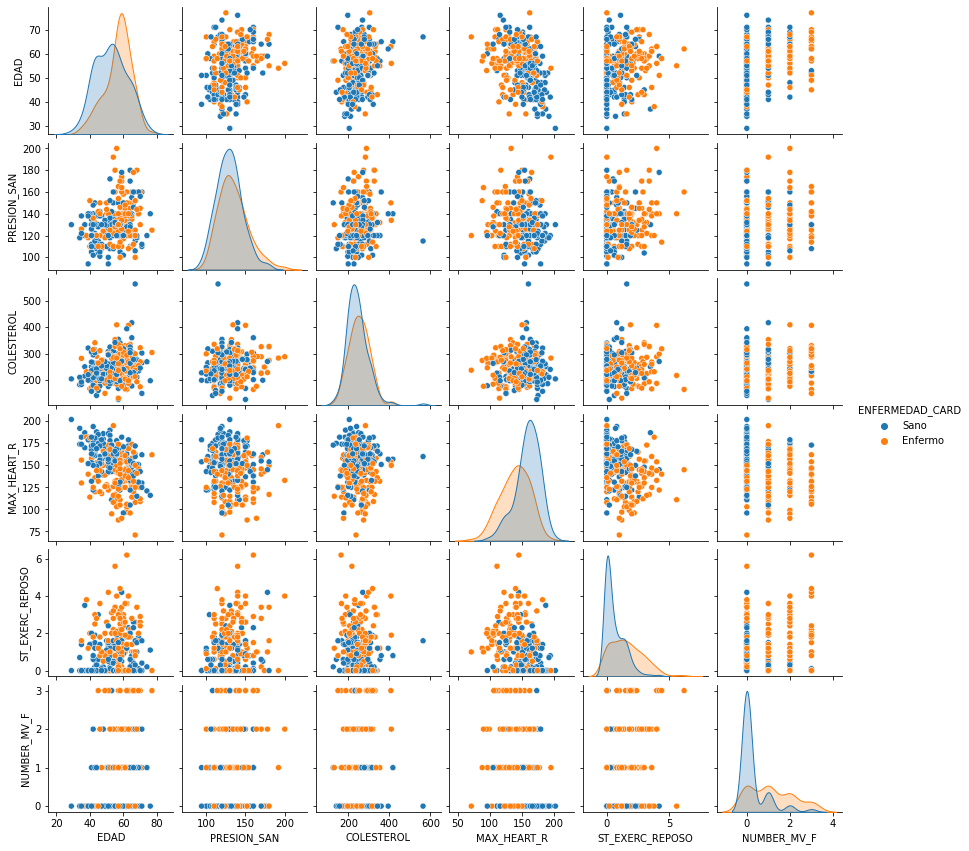

In [57]:

heart_disease_mod=heart_disease
heart_disease_mod.ENFERMEDAD_CARD=heart_disease_mod.ENFERMEDAD_CARD.apply(lambda num: "Sano" if num==0 else "Enfermo")
sns.pairplot(heart_disease_mod,height=2,hue="ENFERMEDAD_CARD")


Exploremos los box-plot de cada variable numerica vs la variable enfermedad cardiaca

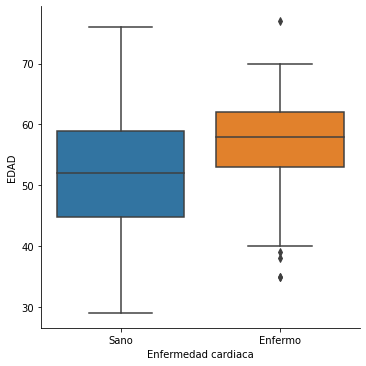

In [58]:
fig=sns.catplot(data=heart_disease_mod, x="ENFERMEDAD_CARD", y="EDAD", kind="box")
fig.set(xlabel="Enfermedad cardiaca")

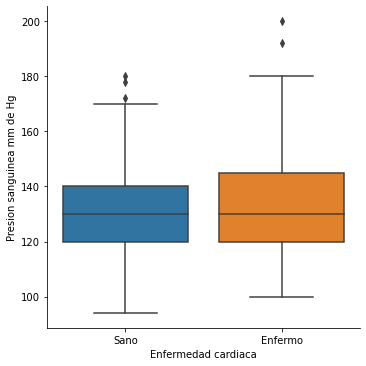

In [59]:
fig=sns.catplot(data=heart_disease_mod, x="ENFERMEDAD_CARD", y="PRESION_SAN", kind="box")
fig.set(ylabel="Presion sanguinea mm de Hg")
fig.set(xlabel="Enfermedad cardiaca")

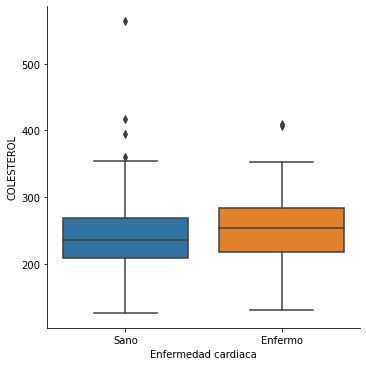

In [60]:
fig=sns.catplot(data=heart_disease_mod, x="ENFERMEDAD_CARD", y="COLESTEROL", kind="box")
fig.set(xlabel="Enfermedad cardiaca")

Modifiquemos el dataset de acuerdo al limite de 130 mmHg para presion normal

C:\Users\pablo\anaconda3\lib\site-packages\pandas\core\generic.py:5507: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


[Text(0, 0.5, 'Frecuencia'),
 Text(0.5, 0, 'Enfermedad cardiaca'),
 Text(0.5, 1.0, 'Grafico de frecuencias para pacientes enfermos y sanos segun sí presentan hipertension')]

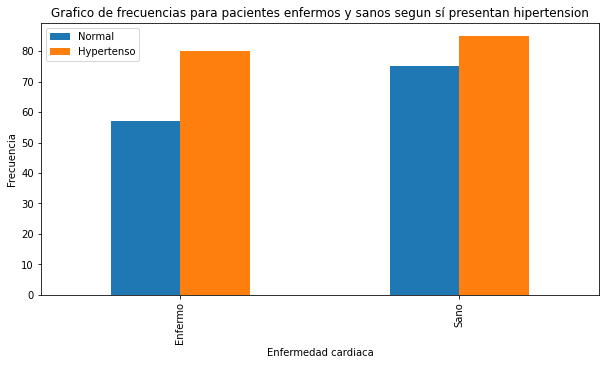

In [61]:
heart_disease_mod.PRESION_SAN=heart_disease_mod.PRESION_SAN.apply(lambda x:0 if x<130 else 1)
ax=pd.crosstab(index=heart_disease_mod["ENFERMEDAD_CARD"],columns=heart_disease_mod["PRESION_SAN"]).plot(kind="bar",figsize=(10, 5))

ax.legend(["Normal","Hypertenso"])
ax.set(ylabel="Frecuencia",xlabel="Enfermedad cardiaca",title="Grafico de frecuencias para pacientes enfermos y sanos segun sí presentan hipertension")

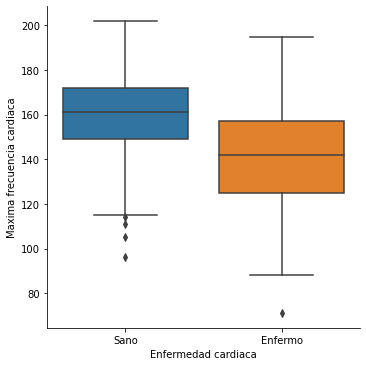

In [15]:
fig=sns.catplot(data=heart_disease_mod, x="ENFERMEDAD_CARD", y="MAX_HEART_R", kind="box")
fig.set(ylabel="Maxima frecuencia cardiaca")
fig.set(xlabel="Enfermedad cardiaca")

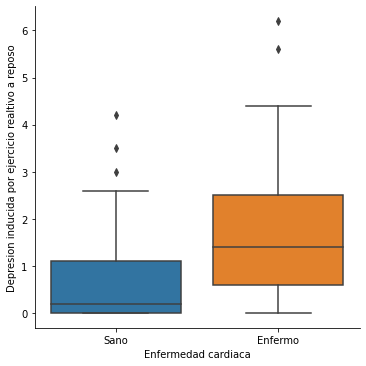

In [16]:
fig=sns.catplot(data=heart_disease_mod, x="ENFERMEDAD_CARD", y="ST_EXERC_REPOSO", kind="box")
fig.set(ylabel="Depresion inducida por ejercicio realtivo a reposo")
fig.set(xlabel="Enfermedad cardiaca")

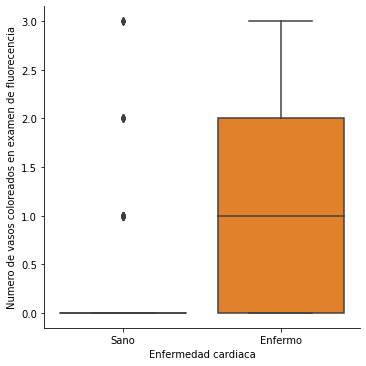

In [17]:
fig=sns.catplot(data=heart_disease_mod, x="ENFERMEDAD_CARD", y="NUMBER_MV_F", kind="box")
fig.set(ylabel="Numero de vasos coloreados en examen de fluorecencia")
fig.set(xlabel="Enfermedad cardiaca")

Estudiemos ahora algunas variables categoricas

[Text(0, 0.5, 'Frecuencia'),
 Text(0.5, 0, 'Enfermedad cardiaca'),
 Text(0.5, 1.0, 'Grafico de frecuencias para pacientes enfermos y sanos segun el sexo')]

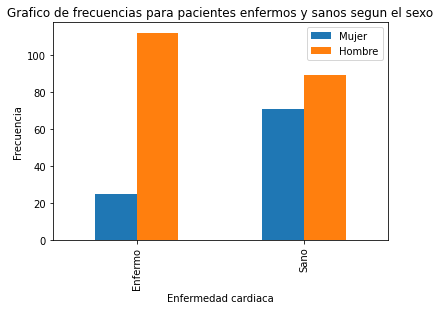

In [18]:
ax=pd.crosstab(index=heart_disease_mod["ENFERMEDAD_CARD"],columns=heart_disease_mod["SEXO"]).plot(kind="bar")
ax.legend(["Mujer","Hombre"])
ax.set(ylabel="Frecuencia",xlabel="Enfermedad cardiaca",title="Grafico de frecuencias para pacientes enfermos y sanos segun el sexo")

[Text(0, 0.5, 'Frecuencia'),
 Text(0.5, 0, 'Enfermedad cardiaca'),
 Text(0.5, 1.0, 'Grafico de frecuencias para pacientes enfermos \ny sanos segun el tipo de dolor en el pecho')]

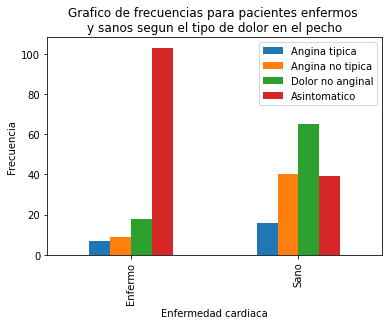

In [19]:
ax=pd.crosstab(index=heart_disease_mod["ENFERMEDAD_CARD"],columns=heart_disease_mod["DOLOR_PECHO"]).plot(kind="bar")
ax.legend(["Angina tipica","Angina no tipica","Dolor no anginal","Asintomatico"])
ax.set(ylabel="Frecuencia",xlabel="Enfermedad cardiaca",title="""Grafico de frecuencias para pacientes enfermos 
y sanos segun el tipo de dolor en el pecho""")

[Text(0, 0.5, 'Frecuencia'),
 Text(0.5, 0, 'Enfermedad cardiaca'),
 Text(0.5, 1.0, 'Grafico de frecuencias para pacientes enfermos \ny sanos segun su nivel de azucar')]

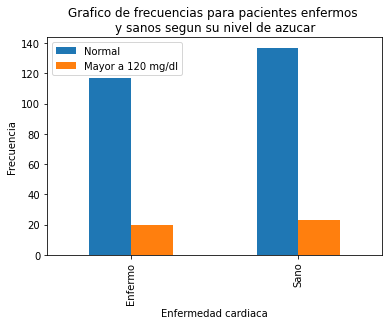

In [20]:
ax=pd.crosstab(index=heart_disease_mod["ENFERMEDAD_CARD"],columns=heart_disease_mod["AZUCAR_SAN"]).plot(kind="bar")
ax.legend(["Normal","Mayor a 120 mg/dl"])
ax.set(ylabel="Frecuencia",xlabel="Enfermedad cardiaca",title="""Grafico de frecuencias para pacientes enfermos 
y sanos segun su nivel de azucar""")


[Text(0, 0.5, 'Frecuencia'),
 Text(0.5, 0, 'Enfermedad cardiaca'),
 Text(0.5, 1.0, 'Grafico de frecuencias para pacientes enfermos\ny sanos segun su electrocardiograma')]

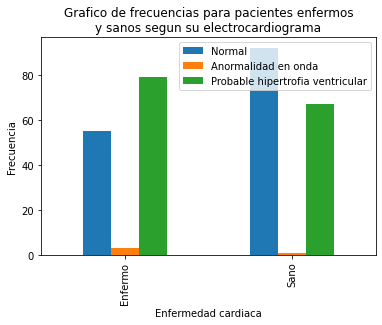

In [21]:
ax=pd.crosstab(index=heart_disease_mod["ENFERMEDAD_CARD"],columns=heart_disease_mod["RES_ELECT"]).plot(kind="bar")
ax.legend(["Normal","Anormalidad en onda","Probable hipertrofia ventricular"])
ax.set(ylabel="Frecuencia",xlabel="Enfermedad cardiaca",title="""Grafico de frecuencias para pacientes enfermos
y sanos segun su electrocardiograma""")

[Text(0, 0.5, 'Frecuencia'),
 Text(0.5, 0, 'Enfermedad cardiaca'),
 Text(0.5, 1.0, 'Grafico de frecuencias para pacientes enfermos \ny sanos segun si presentan angina inducida por ejercicio')]

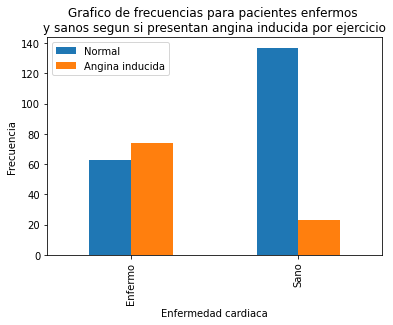

In [22]:
ax=pd.crosstab(index=heart_disease_mod["ENFERMEDAD_CARD"],columns=heart_disease_mod["EXERCISE_IND_ANG"]).plot(kind="bar")
ax.legend(["Normal","Angina inducida"])
ax.set(ylabel="Frecuencia",xlabel="Enfermedad cardiaca",title="""Grafico de frecuencias para pacientes enfermos 
y sanos segun si presentan angina inducida por ejercicio""")

[Text(0, 0.5, 'Frecuencia'),
 Text(0.5, 0, 'Enfermedad cardiaca'),
 Text(0.5, 1.0, 'Grafico de frecuencias para pacientes enfermos \ny sanos segun la pendiente de pico de ejercicio ST')]

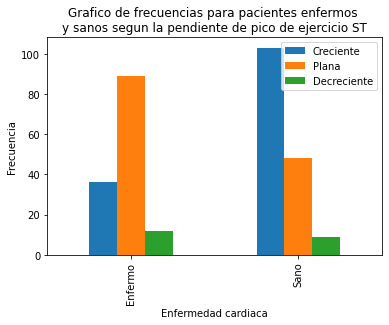

In [23]:
ax=pd.crosstab(index=heart_disease_mod["ENFERMEDAD_CARD"],columns=heart_disease_mod["PENDIENTE"]).plot(kind="bar")
ax.legend(["Creciente","Plana", "Decreciente"])
ax.set(ylabel="Frecuencia",xlabel="Enfermedad cardiaca",title="""Grafico de frecuencias para pacientes enfermos 
y sanos segun la pendiente de pico de ejercicio ST""")

[Text(0, 0.5, 'Frecuencia'),
 Text(0.5, 0, 'Enfermedad cardiaca'),
 Text(0.5, 1.0, 'Grafico de frecuencias para pacientes enfermos \n       y sanos segun su resultado THAL')]

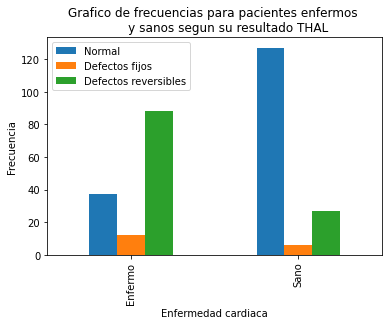

In [68]:
ax=pd.crosstab(index=heart_disease_mod["ENFERMEDAD_CARD"],columns=heart_disease_mod["THAL"]).sort_values(by="ENFERMEDAD_CARD").plot(kind="bar")
ax.legend(["Normal","Defectos fijos", "Defectos reversibles"])
ax.set(ylabel="Frecuencia",xlabel="Enfermedad cardiaca",title="""Grafico de frecuencias para pacientes enfermos 
       y sanos segun su resultado THAL""")

Estudiemos ahora algunas relaciones entre las causas primarias, edad, sexo y colesterol, y las dolencias que se derivan

C:\Users\pablo\anaconda3\lib\site-packages\pandas\io\formats\format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
C:\Users\pablo\anaconda3\lib\site-packages\pandas\io\formats\format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


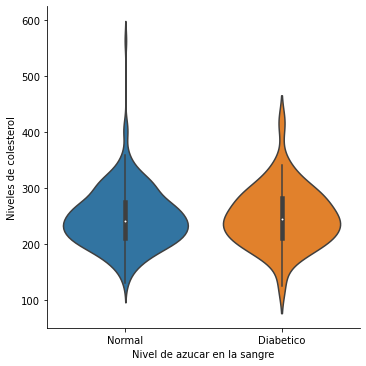

In [25]:
fig=sns.catplot(data=heart_disease_mod, x="AZUCAR_SAN", y="COLESTEROL", kind="violin")
fig.set(ylabel="Niveles de colesterol")
fig.set(xlabel="Nivel de azucar en la sangre")
fig.set_xticklabels(["Normal","Diabetico"])

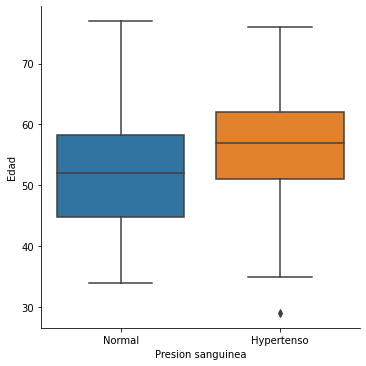

In [26]:
fig=sns.catplot(data=heart_disease_mod, x="PRESION_SAN", y="EDAD", kind="box")
fig.set(ylabel="Edad")
fig.set(xlabel="Presion sanguinea")
fig.set_xticklabels(["Normal","Hypertenso"])

[Text(0, 0, 'Normal'), Text(1, 0, 'Hypertenso')]

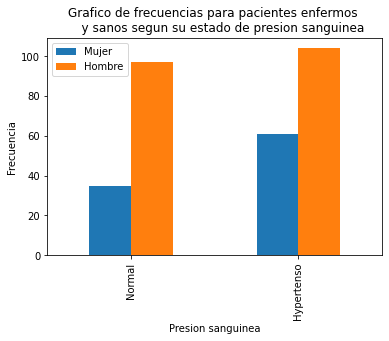

In [27]:
ax=pd.crosstab(index=heart_disease_mod["PRESION_SAN"],columns=heart_disease_mod["SEXO"]).plot(kind="bar")
ax.legend(["Mujer","Hombre"])
ax.set(ylabel="Frecuencia",xlabel="Presion sanguinea",title="""Grafico de frecuencias para pacientes enfermos 
    y sanos segun su estado de presion sanguinea""")
ax.set_xticklabels(["Normal","Hypertenso"])

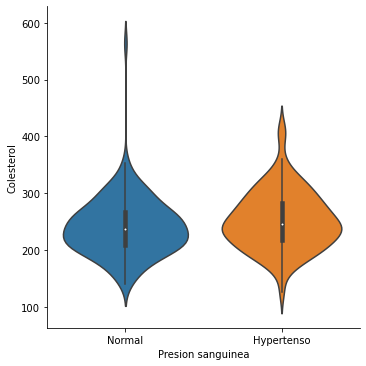

In [28]:
fig=sns.catplot(data=heart_disease_mod, x="PRESION_SAN", y="COLESTEROL", kind="violin")
fig.set(ylabel="Colesterol")
fig.set(xlabel="Presion sanguinea")
fig.set_xticklabels(["Normal","Hypertenso"])

C:\Users\pablo\anaconda3\lib\site-packages\pandas\io\formats\format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
C:\Users\pablo\anaconda3\lib\site-packages\pandas\io\formats\format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


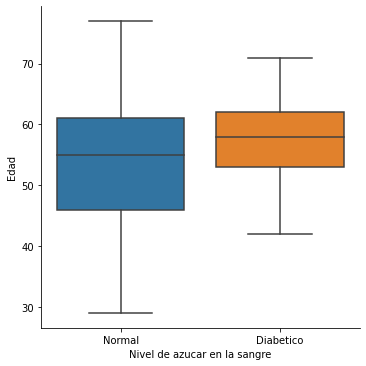

In [29]:
fig=sns.catplot(data=heart_disease_mod, x="AZUCAR_SAN", y="EDAD", kind="box")
fig.set(ylabel="Edad")
fig.set(xlabel="Nivel de azucar en la sangre")
fig.set_xticklabels(["Normal","Diabetico"])

[Text(0, 0, 'Normal'), Text(1, 0, 'Diabetico')]

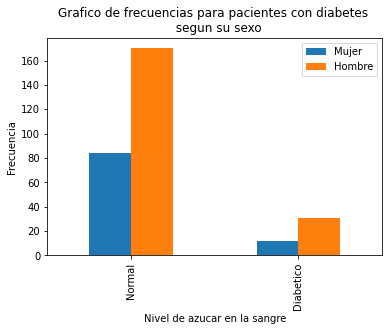

In [30]:
ax=pd.crosstab(index=heart_disease_mod["AZUCAR_SAN"],columns=heart_disease_mod["SEXO"]).plot(kind="bar")
ax.legend(["Mujer","Hombre"])
ax.set(ylabel="Frecuencia",xlabel="Nivel de azucar en la sangre",title="""Grafico de frecuencias para pacientes con diabetes 
  segun su sexo""")
ax.set_xticklabels(["Normal","Diabetico"])

Veamos si las proporciones son similares

In [31]:
azucar_normal=heart_disease_mod[heart_disease_mod.AZUCAR_SAN==0]
azucar_anormal=heart_disease_mod[heart_disease_mod.AZUCAR_SAN==1]
prop_1=len(azucar_normal[azucar_normal.SEXO==0])/len(azucar_normal)
prop_1

0.33070866141732286

In [32]:
prop_2=len(azucar_anormal[azucar_anormal.SEXO==0])/len(azucar_anormal)
prop_2

0.27906976744186046

Hagamos un simple prueba de hipotesis para validar si la proporcion de mujeres respecto al total es diferente en el caso de la 
las poblaciones normales y diabeticas

In [33]:
p_c=(len(azucar_normal[azucar_normal.SEXO==0])+len(azucar_anormal[azucar_anormal.SEXO==0]))/len(heart_disease_mod)
Z_c=(prop_1-prop_2)/np.sqrt((p_c*(1-p_c)/len(azucar_normal))+(p_c*(1-p_c)/len(azucar_normal)))
Z_c

1.2442326581351064

In [34]:
Z_critico=norm.ppf(0.975,0,1)
Z_critico

1.959963984540054

Como nos ha dado en la zona de no rechazo, podemos concluir que no hay evidencia estadistica para inferir que las proporciones 
de mujeres son diferentes en las poblaciones con nivel de azucar normal y diabeticos.

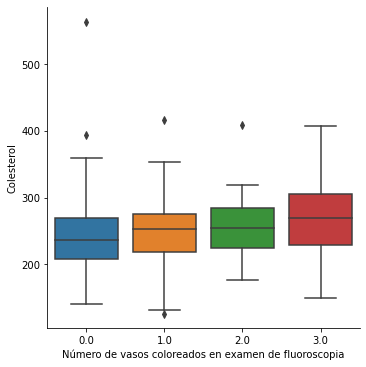

In [35]:
fig=sns.catplot(data=heart_disease_mod, x="NUMBER_MV_F", y="COLESTEROL", kind="box")
fig.set(ylabel="Colesterol")
fig.set(xlabel="Número de vasos coloreados en examen de fluoroscopia")
#fig.set_xticklabels(["Normal","Diabetico"])

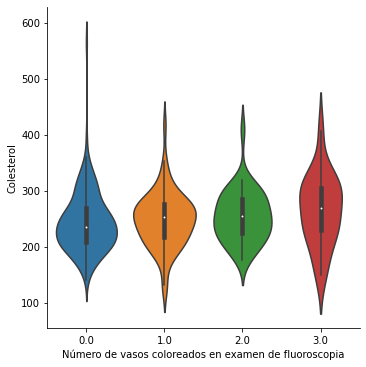

In [36]:
fig=sns.catplot(data=heart_disease_mod, x="NUMBER_MV_F", y="COLESTEROL", kind="violin")
fig.set(ylabel="Colesterol")
fig.set(xlabel="Número de vasos coloreados en examen de fluoroscopia")
#fig.set_xticklabels(["Normal","Diabetico"])

<AxesSubplot:>

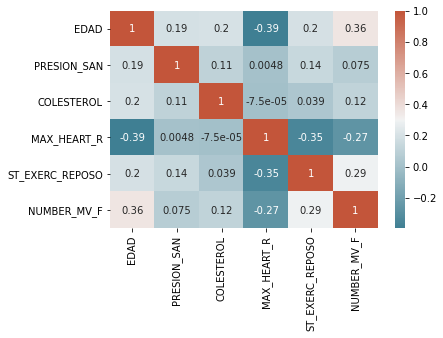

In [69]:
corr = heart_disease_mod.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
            annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

<AxesSubplot:xlabel='MAX_HEART_R', ylabel='COLESTEROL'>

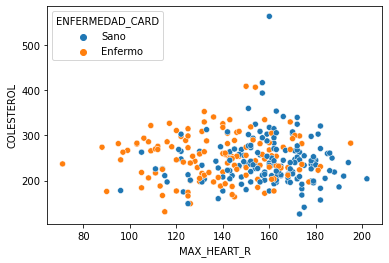

In [74]:
sns.scatterplot(x='MAX_HEART_R', y='COLESTEROL', data=heart_disease_mod, hue="ENFERMEDAD_CARD")


<AxesSubplot:xlabel='MAX_HEART_R', ylabel='EDAD'>

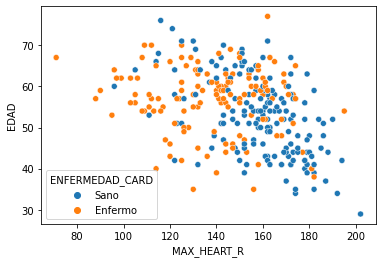

In [79]:
sns.scatterplot(x='MAX_HEART_R', y='EDAD', data=heart_disease, hue="ENFERMEDAD_CARD")